# AD3: conexión con la API del COVID-19 y análisis con Pandas

Me conecto a la API https://api.covid19api.com/

## Instalación e importación de Pandas

In [1]:
!pip install pandas

In [2]:
import pandas as pd

## Variables/objetos

Variable de nombre `url` para llamar a la lista de diccionarios de países de la API del Covid-19. Posteriormente invoco la url para saber si ha funcionado la llamada.

In [3]:
url = 'https://api.covid19api.com/countries'

In [4]:
url

'https://api.covid19api.com/countries'

Añado una variable para la función `pd.read_json` para la variable anterior.

Se podría hacer:

`df = pd.read_json(https://api.covid19api.com/countries`

Se hace a través de variable para facilitar su uso posterior con código más breve.

Posteriormente invoco el datajson para ver si ha funcionado la importación, lo que muestra una tabla en la que hay 248 elementos. En este caso empieza a contar en 0 por tratarse de json. 

Este código nos muestra un estracto con las filas del inicio y las del final.

In [5]:
df = pd.read_json(url)

In [6]:
df

,Country,Slug,ISO2
0,Brazil,brazil,BR
1,Bulgaria,bulgaria,BG
2,China,china,CN
3,Netherlands,netherlands,NL
4,Afghanistan,afghanistan,AF
...,...,...,...
243,Haiti,haiti,HT
244,Madagascar,madagascar,MG
245,Montserrat,montserrat,MS
246,Papua New Guinea,papua-new-guinea,PG


Para visualizar los datos de España, dado que tengo una columna de países, creo una lista nueva que seleccione solo los identificadores similares a `Spain`.

In [7]:
df[df['Country'] == 'Spain']

,Country,Slug,ISO2
201,Spain,spain,ES


Defino otra variable con los datos en tiempo real de España.
(¡ATENCIÓN! la nomenclatura con guion bajo, ya que el guion medio no debe emplearse para código de este tipo).

Creo el objeto `df_rt_es` para que lea la información de la url previa.

Posteriormente muestro los datos para ver que ha funcionado correctamente.

In [10]:
url_rt_es = 'https://api.covid19api.com/country/spain/status/confirmed/live'
df_rt_es = pd.read_json(url_rt_es)
df_rt_es

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
885,Spain,ES,,,,40.46,-3.75,12681820,confirmed,2022-06-25 00:00:00+00:00
886,Spain,ES,,,,40.46,-3.75,12681820,confirmed,2022-06-26 00:00:00+00:00
887,Spain,ES,,,,40.46,-3.75,12681820,confirmed,2022-06-27 00:00:00+00:00
888,Spain,ES,,,,40.46,-3.75,12734038,confirmed,2022-06-28 00:00:00+00:00


Marco `df_rt_es.tail()` para ver la cola de la tabla.

In [11]:
df_rt_es.tail()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
885,Spain,ES,,,,40.46,-3.75,12681820,confirmed,2022-06-25 00:00:00+00:00
886,Spain,ES,,,,40.46,-3.75,12681820,confirmed,2022-06-26 00:00:00+00:00
887,Spain,ES,,,,40.46,-3.75,12681820,confirmed,2022-06-27 00:00:00+00:00
888,Spain,ES,,,,40.46,-3.75,12734038,confirmed,2022-06-28 00:00:00+00:00
889,Spain,ES,,,,40.46,-3.75,12734038,confirmed,2022-06-29 00:00:00+00:00


Marco `df_rt_es.head()` para ver la parte inicial.

In [12]:
df_rt_es.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-26 00:00:00+00:00


Tenemos una tabla con columnas para ID, país, código de país, provincia, ciudad, código de ciudad, latitud, longitud, número de casos, estado y la fecha. Si quiero obtener una gráfica con el número de casos y la fecha lo que debo hacer es transformar la columna de control. Para ello convierto la columna de fecha en columna de control pidiéndole ya que me muestre los casos España con desde el 20 de enero de 2020 al 29 de junio de 2022 con la expresión `df_rt_es.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en España desde 20/01/2020 hasta 29/06/2022")` a la que debo darle un nombre de variable si no quiero tener problemas con la configuración de Anaconda3. Le ponto de nombre `plot_rt_es`.

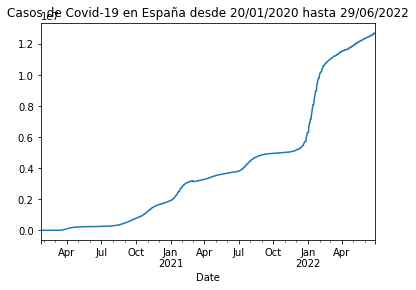

In [14]:
plot_rt_es = df_rt_es.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en España desde 20/01/2020 hasta 29/06/2022")

## Repetir el proceso para Panamá
Llevo a cabo el mismo código de variables, pero para la url de Panamá.

In [15]:
df[df['Country'] == 'Panama']

,Country,Slug,ISO2
121,Panama,panama,PA


In [16]:
url_rt_pa = 'https://api.covid19api.com/country/panama/status/confirmed/live'

In [17]:
url_rt_pa

'https://api.covid19api.com/country/panama/status/confirmed/live'

In [19]:
df_rt_pa = pd.read_json(url_rt_pa)

In [20]:
df_rt_pa

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-22 00:00:00+00:00
1,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-23 00:00:00+00:00
2,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-24 00:00:00+00:00
3,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-25 00:00:00+00:00
4,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
886,Panama,PA,,,,8.54,-80.78,915057,confirmed,2022-06-26 00:00:00+00:00
887,Panama,PA,,,,8.54,-80.78,915923,confirmed,2022-06-27 00:00:00+00:00
888,Panama,PA,,,,8.54,-80.78,917912,confirmed,2022-06-28 00:00:00+00:00
889,Panama,PA,,,,8.54,-80.78,919740,confirmed,2022-06-29 00:00:00+00:00


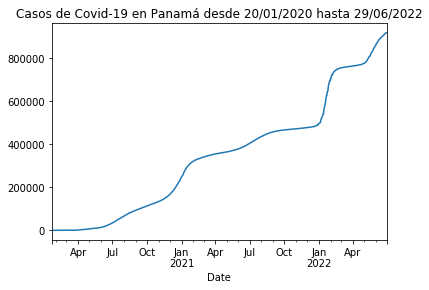

In [25]:
plot_rt_pa = df_rt_pa.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en Panamá desde 20/01/2020 hasta 29/06/2022")